# Estimating Atmospheric Wind Speed Using Cross-Correlation Analysis

---

## Learning Goals

- Understand the concept and mathematical foundation of the cross-correlation function.

- Learn how to compute cross-correlation using both NumPy and SciPy libraries.

- Analyze cross-correlation with noise signals and shifted signals to build intuition.

- Apply cross-correlation techniques to detect atmospheric compositions from realistic spectral lines.

- Grasp the principles of high-resolution spectroscopy for exoplanet atmosphere analysis.

- Learn how to separate the planet’s signal from combined spectra.

- Calculate and interpret the spectral resolving power of observed planetary spectra.

- Perform spectral resolution detrending to match instrument capabilities.

- Use cross-correlation to measure horizontal wind speeds in exoplanet atmospheres.

- Evaluate the effect of instrumental spectral resolution on wind speed measurement accuracy.

- Visualize how resolution impacts the reliability of atmospheric wind speed estimates.

## Table of Contents
- Introduction
- Imports
- Cross-Correlation Function
  - Using the NumPy Package
  - Using the SciPy Package
  - Cross-Correlation of Two Uncorrelated Noise Signals
  - Cross-Correlation of Two Shifted Signals
  - Cross-Correlation of Realistic Spectral Lines (Atmospheric Composition Detection)
- High-Resolution Spectroscopy
  - Separating the Planet's Signal
  - Estimating the Spectral Resolution of the Planet's Signal
  - Calculating the Original Resolution
    - Input Parameters
    - How the Function Works
  - Resolution Detrending
    - Input Parameters
    - How the Function Works
- Wind Speed Measurement
  - Plotting the Doppler Off vs. Doppler On Spectra
  - Measuring Wind Speed via Cross-Correlation
    - Input Parameters
    - How the Function Works
  - Estimating Wind Speed at Full Resolution
  - Effect of Instrument Resolution on Wind Speed Measurement
  - Resolution vs. Wind Speed Measurement Accuracy
- End of Tutorial
- References
- About this Notebook

## Introduction

In recent years, the study of planets outside our solar system has grown quickly. One of the best ways to learn about these planets is by looking at their atmospheres using high-resolution spectroscopy (Birkby, 2018). This technique breaks light into many tiny parts so we can see details that would otherwise be hidden. Finding the planet’s signal is not easy. The light from the star it orbits is much stronger, and Earth's atmosphere can also get in the way. To solve this, scientists use a method called cross-correlation. This method helps pick out the planet’s unique signals by matching patterns in the data. Besides knowing what the atmosphere is made of, we also want to understand how winds and weather work on these planets. By studying small shifts in the light caused by movement, we can measure wind speeds and rotation (Birkby, 2018). This tells us more about the planet’s climate. In this tutorial, you will learn how to use cross-correlation and high-resolution spectroscopy to find these signals and measure wind speeds. You will also see how the quality of the instruments affects what we can learn. This tutorial is made for anyone interested in exploring exoplanet atmospheres. By the end, you will have a good understanding of how scientists study these distant worlds.

## Imports

The main packages and their use-cases in this tutorial are as follows:

- numpy: to handle array functions and numerical operations

- matplotlib.pyplot: for plotting data and creating visualizations

- scipy.interpolate.interp1d, splev, and splrep: for interpolation and spline fitting

- scipy.ndimage: for applying convolution and image processing functions

- pandas: to load and manage tabular data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.interpolate import interp1d
from scipy.interpolate import splev, splrep
from scipy import ndimage
import pandas as pd

## Cross-Correlation Function

The cross-correlation function is a powerful technique used to extract information from noisy or low signal-to-noise observations by evaluating the similarity between two spectra. In exoplanet atmospheric studies, it is especially useful for recovering transmission spectra that cannot be directly resolved. Following the approach outlined in Kempton et al. (2014), the observed spectrum is cross-correlated against a template, typically a model spectrum of the same system. A distinct peak in the cross-correlation function indicates the presence of matching spectral features, thereby revealing the atmospheric composition. To simulate what is observationally accessible, Kempton et al. cross-correlated Doppler-shifted transmission models against their unshifted counterparts. The position of the peak in velocity space reflects the net line-of-sight (LOS) velocity, allowing estimation of wind speeds in the planet’s upper atmosphere. Thus, both molecular detection and wind measurements are made possible through this cross-correlation framework, even when direct spectral retrieval is limited.

### Using the NumPy Package

To begin with a simple example, we can use the numpy library to calculate the cross-correlation between two signals. This serves as a straightforward introduction before moving on to more complex or realistic datasets. The basic syntax for NumPy’s correlate function is:

````python
np.correlate(data_1, data_2, mode = '...')
````

Here, data_1 and data_2 are array-like inputs representing the two signals to be compared. The mode parameter determines how the overlap between the arrays is treated. The available modes are:

- 'valid': Returns only those parts of the correlation where the signals completely overlap, with no zero-padding. The result length is max(0, len(a) - len(b) + 1) when len(a) ≥ len(b). This mode gives the "pure" correlation.

- 'same': Produces output of the same length as data_1, centered. Zero-padding is applied as necessary.

- 'full': Computes the full cross-correlation, including all partial overlaps. The result length is len(a) + len(b) - 1.

For further details, refer to the NumPy documentation: https://numpy.org/devdocs/reference/generated/numpy.correlate.html

### Using the SciPy Package

When working with higher-dimensional data (e.g., 2D or 3D arrays), NumPy’s correlate function is not sufficient. In such cases, you can use scipy.signal.correlate.  First, import the required module:

In [2]:
from scipy import signal

Then, compute the cross-correlation:

````python
signal.correlate(data_1, data_2, mode = '...', method = '...')
````

Here, data_1 and data_2 must have the same number of dimensions.

Supported mode options:

- 'valid': Returns results only where full overlap occurs.

- 'same': Returns an output with the same shape as data_1.

- 'full': Returns the complete correlation including partial overlaps (default).

Additionally, SciPy offers a method parameter:

- 'direct': Computes the correlation using the direct mathematical formula.

- 'fft': Uses the Fast Fourier Transform for faster computation.

- 'auto': Automatically selects the faster method (default).

The output is an array with the same number of dimensions as the inputs, containing the cross-correlation values. For more information, visit the SciPy documentation: https://docs.scipy.org/doc/scipy-1.16.0/reference/generated/scipy.signal.correlate.html

Now that we’ve reviewed how to perform cross-correlation using both NumPy and SciPy, let’s move on to an example using NumPy for simplicity.

### Cross-Correlation of Two Uncorrelated Noise Signals

The following example shows the cross-correlation between two random Gaussian noise signals, s1 and s2. Since the signals are purely random and uncorrelated, we expect no significant peak in the cross-correlation function. This serves as a baseline demonstration that cross-correlation does not produce artificial signals when no real correlation exists.

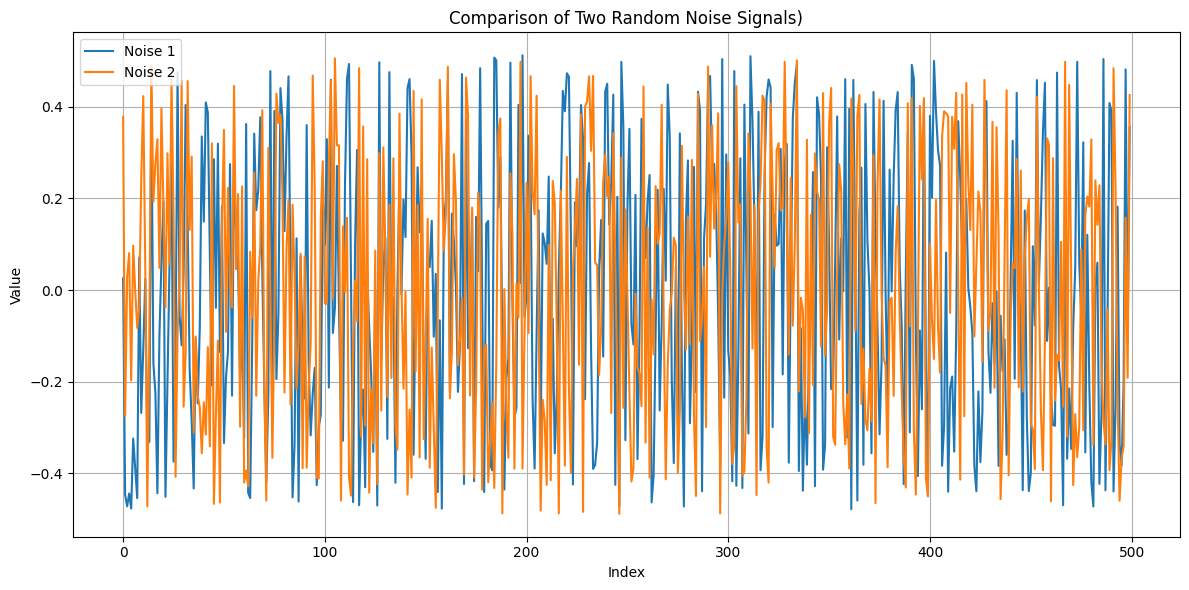

In [3]:
# generate independent random noise
noise_1 = np.random.uniform(0, 1, 500)
noise_2 = np.random.uniform(0, 1, 500)

# remove mean to prevent DC offset
noise_1 = noise_1 - np.mean(noise_1)
noise_2 = noise_2 - np.mean(noise_2)

# plot the figure of two different noises
plt.figure(figsize = (12, 6))
plt.plot(noise_1, label = 'Noise 1')
plt.plot(noise_2, label = 'Noise 2')
plt.title('Comparison of Two Random Noise Signals)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

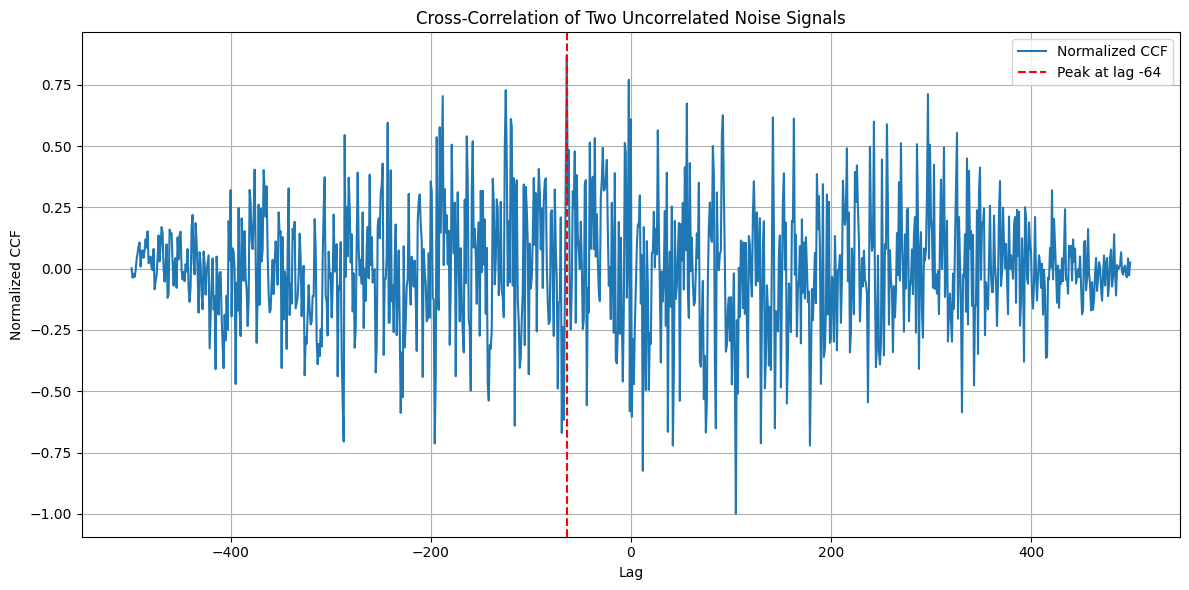

In [4]:
# cross correlation
ccf_noise = np.correlate(noise_1, noise_2, mode = 'full')
normalized_ccf_noise = ccf_noise / np.max(np.abs(ccf_noise))

# define lag axis
lags = np.arange(-len(noise_1) + 1, len(noise_1))

# find peak
peak_index = np.argmax(normalized_ccf_noise)
peak_lag = lags[peak_index]

# plot cross-correlation
plt.figure(figsize = (12, 6))
plt.plot(lags, normalized_ccf_noise, label = 'Normalized CCF')
plt.axvline(x = peak_lag, color = 'red', linestyle = '--', label = f'Peak at lag {peak_lag}')
plt.title('Cross-Correlation of Two Uncorrelated Noise Signals')
plt.xlabel('Lag')
plt.ylabel('Normalized CCF')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

As expected, the plot does not show any strong peak. The correlation values fluctuate around zero, indicating no systematic alignment between the two signals. This result confirms that the cross-correlation function is sensitive to genuine similarity and does not produce false positives when signals are unrelated.

### Cross-Correlation of Two Shifted Signals

Let’s try something more realistic. In the atmosphere of an exoplanet, various chemical species such as carbon monoxide, water vapor, and sodium leave distinctive spectral signatures. Some species absorb light, forming dark absorption lines on a continuous spectrum; others emit light, producing bright emission lines on a dark background. The combined spectrum we receive from an exoplanet reflects this complex mixture. Since we're focusing on exoplanets, here are several molecular and atomic features commonly observed using cross-correlation techniques:

- CO (Carbon Monoxide): strong absorption near 1.4 µm, observed in hot Jupiter spectra from HST WFC3 (Ranjan et al., 2014).

- H₂O (Water Vapor): has a major absorption band near 1.4 µm, observed in transmission and emission spectra of hot Jupiters using HST WFC3 (Ranjan et al., 2014).

- CH₄ (Methane): dominant band at 3.3 µm, with additional features near 1.6 µm and 2.3 µm; the 3.3 µm band is particularly strong in warm exoplanets (Fortney et al., 2020).

- Na I (Neutral Sodium): two narrow D-lines at 589.0 nm and 589.6 nm, commonly seen in transmission spectra (Ahrer et al., 2022).

- CO₂ (Carbon Dioxide): strong bands near 4.3 µm and 15 µm; absorption strength depends on pressure and abundance (Wei et al., 2018).

- HCN (Hydrogen Cyanide): broad absorption near 3 µm, often seen in carbon-rich atmospheres (Harris et al., 2006).

In our simulation, we combine the spectral signatures of these species with random noise to replicate a realistic exoplanet signal. This allows us to demonstrate how cross-correlation techniques can recover individual species, even in noisy observational data. For simplicity, each spectral line is represented by a Gaussian centered at its characteristic wavelength.

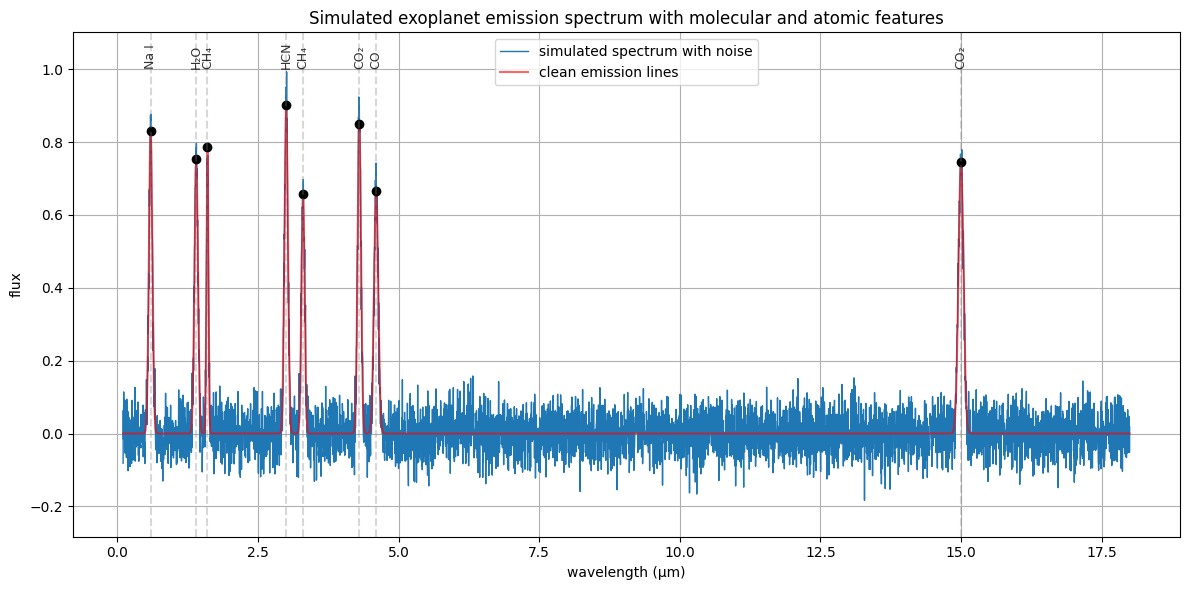

In [5]:
# define gaussian behavior for the spectral features
def gaussian(x, a, b, c):
    return a * np.exp(-((x - b) ** 2) / (2 * c ** 2))

# define wavelength grid
wl = np.linspace(0.1, 18.0, 5000)  # in microns

# spectral species with reduced wavelengths to avoid clutter
species_list = [
    {"name": "CO",   "wavelengths": [4.6]},
    {"name": "H₂O",  "wavelengths": [1.4]},   
    {"name": "CH₄",  "wavelengths": [1.6, 3.3]},   
    {"name": "Na I", "wavelengths": [0.5896]},             
    {"name": "CO₂",  "wavelengths": [4.3, 15.0]},
    {"name": "HCN",  "wavelengths": [3.0]}
]

# initialize clean flux spectrum
flux_clean = np.zeros_like(wl)

# add gaussian emission lines
for species in species_list:
    for line_wl in species["wavelengths"]:
        if 0.1 <= line_wl <= 18.0:
            amp = np.random.uniform(0.4, 1.0)      # line strength
            width = np.random.uniform(0.01, 0.05)  # line width
            flux_clean += gaussian(x = wl, a = amp, b = line_wl, c = width)

# add random gaussian noise
noise = np.random.normal(loc = 0.0, scale = 0.05, size = wl.shape)
flux_noisy = flux_clean + noise

# plot the spectrum
plt.figure(figsize = (12, 6))
plt.plot(wl, flux_noisy, label = 'simulated spectrum with noise', lw = 1)
plt.plot(wl, flux_clean, label = 'clean emission lines', color = 'red', alpha = 0.6)

max_flux = max(flux_clean) + 0.2  # y position for labels above plot

for species in species_list:
    color = 'black'
    for line_wl in species["wavelengths"]:
        if 0.1 <= line_wl <= 18.0:
            idx = np.abs(wl - line_wl).argmin()
            peak_flux = flux_clean[idx]
            
            # plot marker at peak
            plt.plot(wl[idx], peak_flux, marker = 'o', color = color, markersize = 6)
            
            # draw faint dashed vertical line
            plt.axvline(x = line_wl, color = 'gray', linestyle = '--', alpha = 0.3)
            
            # place text label above plot near the dashed line
            plt.text(line_wl, max_flux - 0.1,
                     species["name"],
                     fontsize = 9,
                     color = color,
                     rotation = 90,
                     va = 'bottom',
                     ha = 'center',
                     alpha = 0.8)

plt.ylim(bottom = min(flux_noisy) - 0.1, top = max_flux)
plt.xlabel("wavelength (µm)")
plt.ylabel("flux")
plt.title("Simulated exoplanet emission spectrum with molecular and atomic features")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

This simulated spectrum is simplified and idealized. Real observational data is often more complex and noisier, affected by factors such as the interstellar medium (ISM) and instrumental noise. However, this example clearly shows the fundamental concept of how cross-correlation can be used to identify spectral features. Next, let’s map this spectral data onto a time array grid and apply cross-correlation to detect the presence and shifts of these spectral signals.

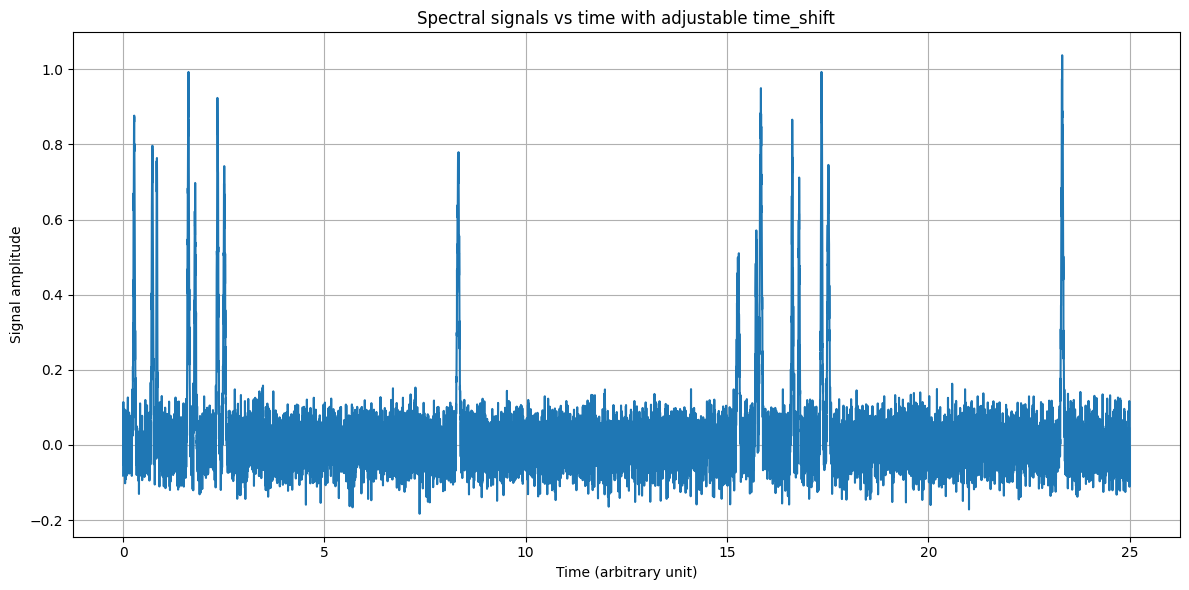

In [6]:
# parameters
t_signal = 10                 # duration of each signal (arbitrary unit)
t_shift = 5                   # time gap (shift) between signals (arbitrary unit)
fs = len(wl)                  # number of samples per signal
dt = t_signal / fs            # time resolution per sample

# total duration to hold both signals plus gap
total_duration = t_signal * 2 + t_shift  
time = np.linspace(0, total_duration, int(total_duration / dt))  # full time array

# signal 1: original flux_noisy placed from t=0 to t_signal
signal1 = np.zeros_like(time)
signal1[:fs] = flux_noisy

# generate signal 2 with different amplitude and width
flux_clean_2 = np.zeros_like(wl)
for species in species_list:
    for line_wl in species["wavelengths"]:
        amp = np.random.uniform(0.4, 1.0)
        width = np.random.uniform(0.01, 0.05)
        flux_clean_2 += gaussian(wl, amp, line_wl, width)

noise_2 = np.random.normal(0.0, 0.05, size = wl.shape)
flux_noisy_2 = flux_clean_2 + noise_2

# length of gap in samples
gap_samples = int(t_shift / dt)

# define signal2 placed with time_shift
signal2 = np.zeros_like(time)
start_idx = fs + gap_samples  # start of signal2 after signal1 and gap
signal2[start_idx:start_idx + fs] = flux_noisy_2

# initialize combined signal array
combined_signal = np.zeros_like(time)

# put signal 1 in place
combined_signal[:fs] = flux_noisy

# put noise in the gap
noise_gap = np.random.normal(0.0, 0.05, size = gap_samples)
combined_signal[fs:fs + gap_samples] = noise_gap

# put signal 2 in place
combined_signal[start_idx:start_idx + fs] = flux_noisy_2

# plot combined signal
plt.figure(figsize = (12, 6))
plt.plot(time, combined_signal)
plt.xlabel('Time (arbitrary unit)')
plt.ylabel('Signal amplitude')
plt.title('Spectral signals vs time with adjustable time_shift')
plt.grid(True)
plt.tight_layout()
plt.show()

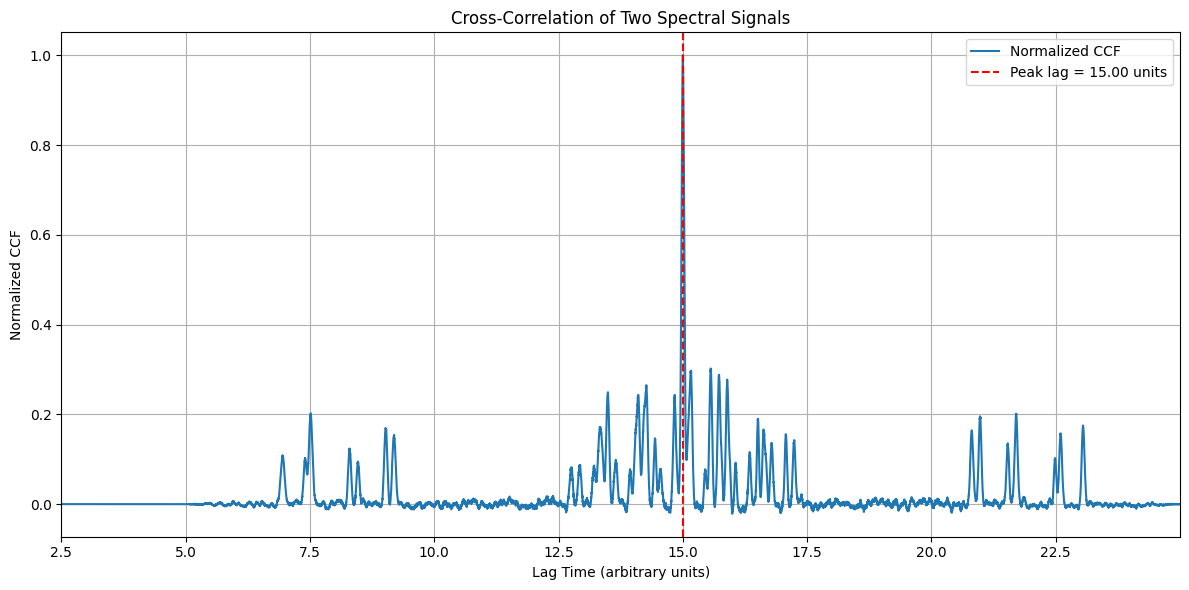

In [7]:
# cross-correlation
ccf_signal = np.correlate(signal2, signal1, mode = 'full')
normalized_ccf_signal = ccf_signal / np.max(np.abs(ccf_signal))

# define lag axis in samples
lags = np.arange(-len(signal1) + 1, len(signal1))

# convert lag to time units
lags_time = lags * dt

# find peak index and corresponding lag time
peak_index = np.argmax(normalized_ccf_signal)
peak_lag_time = lags_time[peak_index]

# plot cross-correlation
plt.figure(figsize = (12, 6))
plt.plot(lags_time, normalized_ccf_signal, label = 'Normalized CCF')
plt.axvline(x = peak_lag_time, color = 'red', linestyle = '--', label = f'Peak lag = {peak_lag_time:.2f} units')
plt.title('Cross-Correlation of Two Spectral Signals')
plt.xlabel('Lag Time (arbitrary units)')
plt.ylabel('Normalized CCF')
plt.legend()
plt.grid(True)
plt.tight_layout()
window = (len(signal1) // 2) * dt
x_min = max(peak_lag_time - window, lags_time[0])
x_max = min(peak_lag_time + window, lags_time[-1])
plt.xlim(x_min, x_max)
plt.show()

From the CCF plot above, we see that the normalized cross-correlation peaks at t = 15. This means the two signals are shifted relative to each other by 15 time units. This result matches the time values we assigned earlier: a signal duration of 10 units plus a time gap of 5 units, summing to 15 units total. You can experiment with these time values yourself; the peak lag will always correspond to the combined duration of the signal and the gap between signals. Moreover, the cross-correlation produces a clear peak even when the amplitudes of the two signals are not the same. This highlights one of the strengths of cross-correlation: it focuses on the similarity of patterns rather than their absolute magnitudes. This makes it a powerful technique when signals are noisy, partially missing, or scaled differently, which is often the case in real observational data.

### Cross-Correlation of Realistic Spectral Lines (Atmospheric Composition Detection)

In exoplanet research, cross-correlation is commonly used to detect molecular signatures in planetary atmospheres. By comparing the observed spectrum to high-resolution template spectra of molecules such as H₂O, CH₄, CO, or Na I, we can identify which species are present, even when the signals are weak or noisy. Let’s now apply this to real data from the exoplanet WASP-121b, an ultra-hot Jupiter with a mass of 1.16 M<sub>J</sub> and a radius of 1.75 R<sub>J</sub>. It orbits its host star every 1.27 days at a distance of 0.026 AU. With an equilibrium temperature of about 2341 K (Bourrier et al., 2020), its atmosphere is extremely hot and likely to host atomic and molecular species in emission. The spectrum shown below is the emission spectrum of carbon monoxide (CO) from WASP-121b, used here as a template in the cross-correlation analysis. This spectrum is taken from Beltz & Rauscher (2024), which presents high-resolution spectroscopic data to investigate magnetic effects in ultra-hot Jupiters.

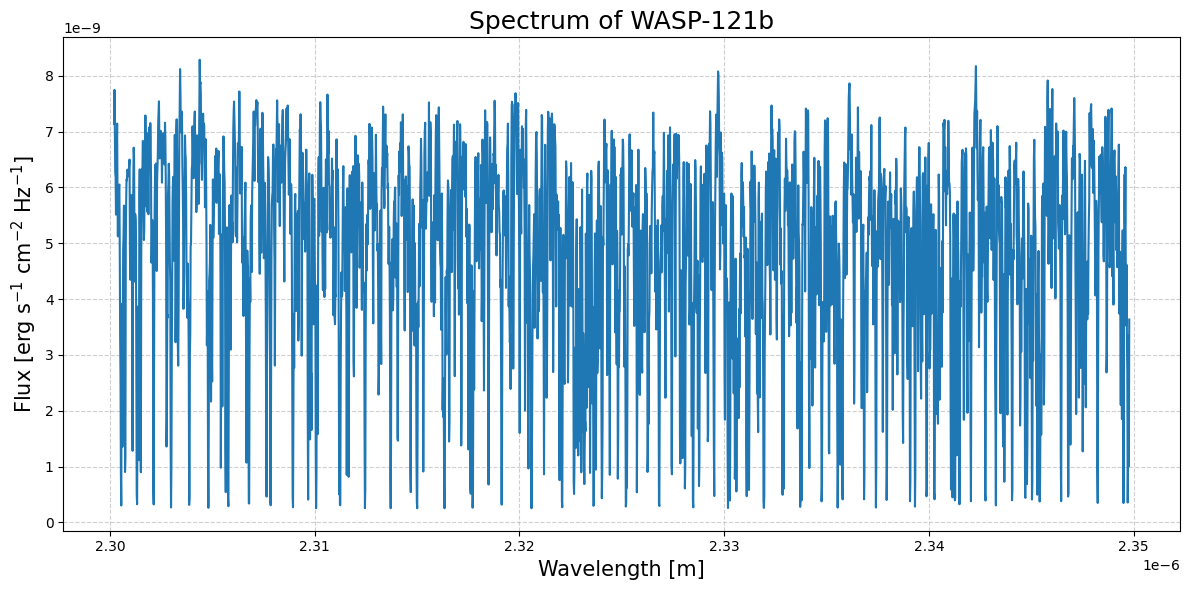

In [8]:
# path to open file
file_path_121 = '/Users/srnpt.p/Desktop/UMD_Summer_Project/W121/Spec_0_asp-121b-0G_IR_phase_0.0_inc_00.00.0000.00.dat'
df_121 = pd.read_csv(file_path_121, sep = '\t', header = None, names = ['wavelength', 'flux']).iloc[10:-10]
wavelength_121 = df_121['wavelength'].values
flux_121 = df_121['flux'].values

# plot
plt.figure(figsize = (12, 6))
plt.plot(wavelength_121, flux_121)
plt.title('Spectrum of WASP-121b', fontsize = 18)
plt.xlabel(r'Wavelength [m]', fontsize = 15)
plt.ylabel(r'Flux [erg s$^{-1}$ cm$^{-2}$ Hz$^{-1}$]', fontsize = 15)
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.tight_layout()
plt.show()

Since we know that this is an emission spectrum of carbon monoxide, we can now test this by performing a cross-correlation between the observed spectrum and a high-resolution reference spectrum of CO from HITWMP. You can explore other molecular features on your own, but in this example, we'll focus on confirming whether carbon monoxide is truly present. Feel free to download the line-by-line molecular data from the HITEMP here: https://hitran.org/hitemp/.

In the example below, we load the CO data from HITRAN and perform a cross-correlation with the observed spectrum to check for the presence of carbon monoxide.

In [9]:
# file path to CO data
file_path_CO = '/Users/srnpt.p/Downloads/05_HITEMP2019.par'
colspecs = [
    (0, 2),    # molecule number
    (2, 3),    # isotope number
    (3, 15),   # wavenumber [cm^-1]
    (15, 25),  # intensity [cm/molecule]
    (25, 30),  # air-broadened half-width
    (30, 35),  # self-broadened half-width
    (35, 45),  # lower state energy
]
names = ['molecule_number', 'isotope_number', 'wavenumber', 'intensity', 'air_half_width', 'self_half_width', 'lower_state_energy']
df_CO = pd.read_fwf(file_path_CO, colspecs = colspecs, names = names)
print(df_CO)

        molecule_number  isotope_number    wavenumber      intensity  \
0                     5               5      2.248764  2.700000e-164   
1                     5               5      2.279785  6.503000e-162   
2                     5               6      2.288013  3.667000e-166   
3                     5               5      2.310683  1.737000e-159   
4                     5               6      2.320259  8.961000e-164   
...                 ...             ...           ...            ...   
752971                5               1  22147.135667   1.804000e-31   
752972                5               1  22147.866612   2.015000e-31   
752973                5               1  22147.897630   1.933000e-31   
752974                5               1  22148.263252   2.038000e-31   
752975                5               1  22148.273542   2.011000e-31   

        air_half_width  self_half_width lower_state_energy  
0                 8.70     4.000000e-07         .07970.086  
1            

From this .par file, we can find wavelength using wavenumber as wavenumber is in cm $^{-1}$. This can be converted to m unit using:

$$
\lambda = \frac{1}{100 \times \text{wavenumber}}
$$

where

- $\lambda$ is the wavelength in meters (m),
- wavenumber is in (cm $^{-1}$).

Multiplying the wavenumber by 100 converts it from cm $^{-1}$ to m $^{-1}$, then taking the reciprocal gives the wavelength in meters.

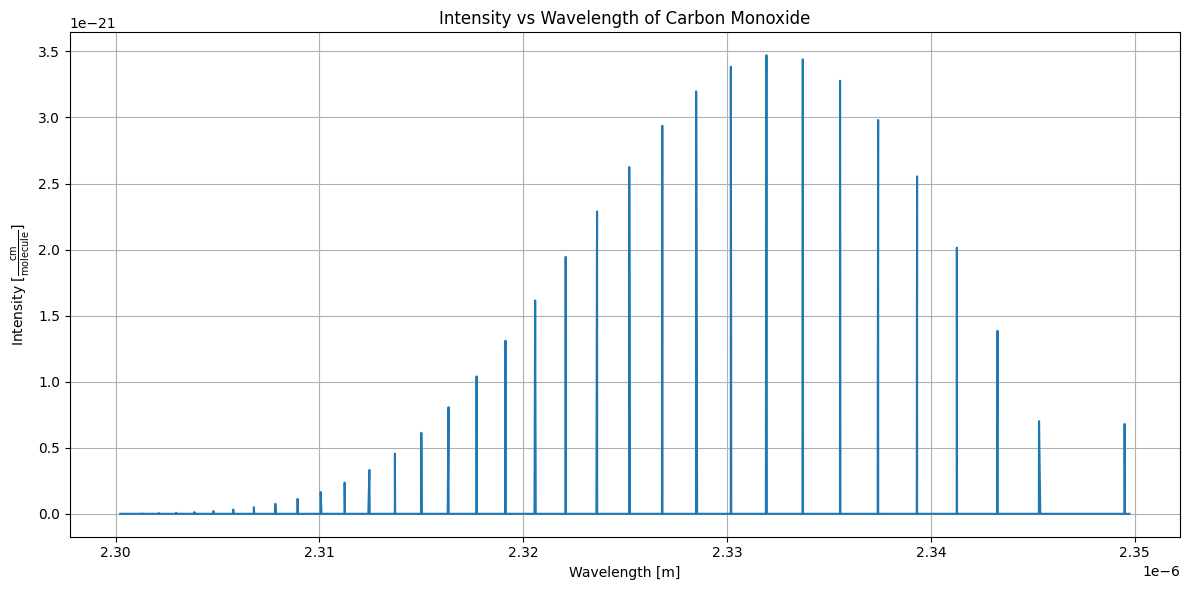

In [10]:
# change wavenumber to wavelength in meters
df_CO['wavelength_m'] = 1 / (100 * df_CO['wavenumber'])  # m

# sort for proper plotting
df_CO_sorted = df_CO.sort_values('wavelength_m')
wl_min = np.min(wavelength_121)
wl_max = np.max(wavelength_121)
df_CO_sorted = df_CO_sorted[(df_CO_sorted['wavelength_m'] >= wl_min) & (df_CO_sorted['wavelength_m'] <= wl_max)]

# plot
plt.figure(figsize = (12, 6))
plt.plot(df_CO_sorted['wavelength_m'], df_CO_sorted['intensity'])
plt.xlabel('Wavelength [m]')
plt.ylabel('Intensity [$\\frac{\\text{cm}}{\\text{molecule}}$]')
plt.title('Intensity vs Wavelength of Carbon Monoxide')
plt.grid(True)
plt.tight_layout()
plt.show()

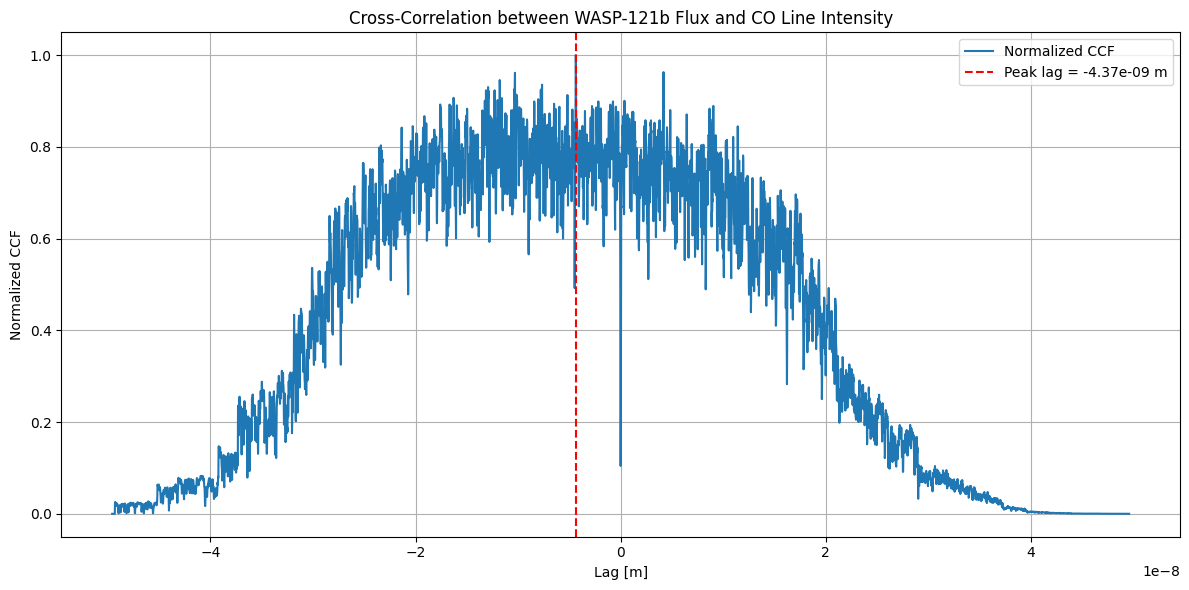

In [11]:
# interpolate CO intensity to match the WASP-121b wavelength grid
interp_CO = interp1d(df_CO_sorted['wavelength_m'], df_CO_sorted['intensity'], kind = 'linear', bounds_error = False, fill_value = 0)
co_on_121_grid = interp_CO(wavelength_121)

# use full WASP-121b wavelength grid
flux_valid = flux_121
co_valid = co_on_121_grid
wavelength_valid = wavelength_121

# normalized cross-correlation
ccf_signal = np.correlate(flux_valid, co_valid, mode = 'full')
normalized_ccf_signal = ccf_signal / np.max(np.abs(ccf_signal))

# define lag axis based on full wavelength grid
lags = np.arange(-len(co_valid) + 1, len(co_valid))
dlambda = np.median(np.diff(wavelength_valid))
lags_lambda = lags * dlambda

# find peak index and lag
peak_index = np.argmax(normalized_ccf_signal)
peak_lag = lags_lambda[peak_index]

# plot
plt.figure(figsize = (12, 6))
plt.plot(lags_lambda, normalized_ccf_signal, label = 'Normalized CCF')
plt.axvline(x = peak_lag, color = 'red', linestyle = '--', label = f'Peak lag = {peak_lag:.2e} m')
plt.title('Cross-Correlation between WASP-121b Flux and CO Line Intensity')
plt.xlabel('Lag [m]')
plt.ylabel('Normalized CCF')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

From the plot above, the cross-correlation function has a clear peak, just like what we have done so far. This confirms that the line we used is indeed a carbon monoxide emission line. It suggests that the atmosphere of WASP-121b contains carbon monoxide, which leaves a unique spectral fingerprint through its emission. So, even though we see a peak, the shape and strength of the signal help us tell the difference between a real match and something that just looks like one. Now, let's test another spectral feature that is not from carbon monoxide to see if the result still behaves the same. Let's try with nitric oxide (NO).

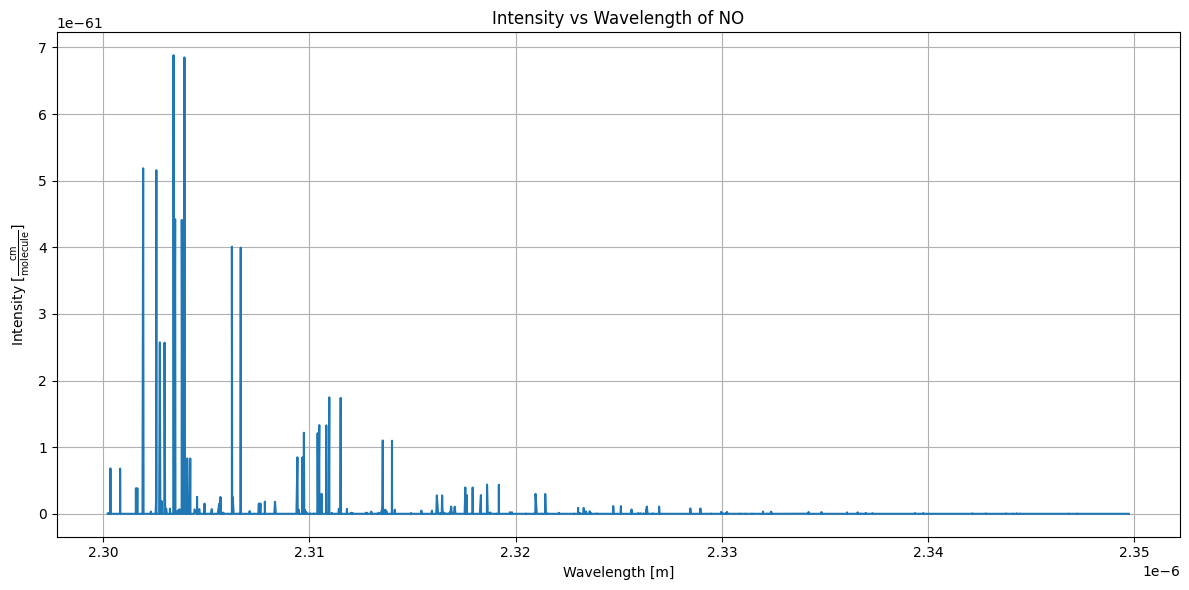

In [12]:
# file path to NO data
file_path_NO = '/Users/srnpt.p/Downloads/08_HITEMP2019.par'

# define fixed-width column specs and names
colspecs = [
    (0, 2),    # molecule number
    (2, 3),    # isotope number
    (3, 15),   # wavenumber [cm^-1]
    (15, 25),  # intensity [cm/molecule]
    (25, 30),  # air-broadened half-width
    (30, 35),  # self-broadened half-width
    (35, 45),  # lower state energy
]
names = ['molecule_number', 'isotope_number', 'wavenumber', 'intensity', 'air_half_width', 'self_half_width', 'lower_state_energy']

# read the data
df_NO = pd.read_fwf(file_path_NO, colspecs = colspecs, names = names)

# convert wavenumber to wavelength in meters
df_NO['wavelength_m'] = 1 / (100 * df_NO['wavenumber'])  # m

# sort for proper plotting
df_NO_sorted = df_NO.sort_values('wavelength_m')

# set wavelength range of interest (in meters)
wl_min = np.min(wavelength_121)
wl_max = np.max(wavelength_121)
df_NO_sorted = df_NO_sorted[(df_NO_sorted['wavelength_m'] >= wl_min) & (df_NO_sorted['wavelength_m'] <= wl_max)]

# plot
plt.figure(figsize = (12, 6))
plt.plot(df_NO_sorted['wavelength_m'], df_NO_sorted['intensity'])
plt.xlabel('Wavelength [m]')
plt.ylabel('Intensity [$\\frac{\\text{cm}}{\\text{molecule}}$]')
plt.title('Intensity vs Wavelength of NO')
plt.grid(True)
plt.tight_layout()
plt.show()

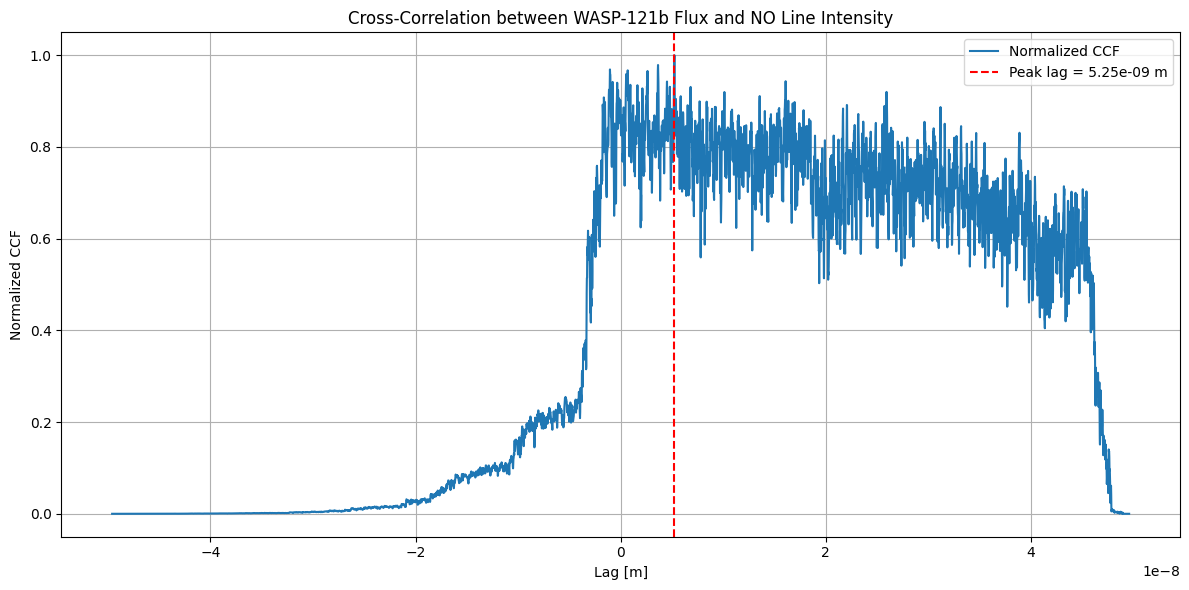

In [13]:
# interpolate NO intensity to match the WASP-121b wavelength grid
interp_NO = interp1d(df_NO_sorted['wavelength_m'], df_NO_sorted['intensity'], kind = 'linear', bounds_error = False, fill_value = 0)
NO_on_121_grid = interp_NO(wavelength_121)

# use full WASP-121b wavelength grid
flux_valid = flux_121
NO_valid = NO_on_121_grid
wavelength_valid = wavelength_121

# normalized cross-correlation
ccf_signal = np.correlate(flux_valid, NO_valid, mode = 'full')
normalized_ccf_signal = ccf_signal / np.max(np.abs(ccf_signal))

# define lag axis based on full wavelength grid
lags = np.arange(-len(NO_valid) + 1, len(NO_valid))
dlambda = np.median(np.diff(wavelength_valid))
lags_lambda = lags * dlambda

# find peak index and lag
peak_index = np.argmax(normalized_ccf_signal)
peak_lag = lags_lambda[peak_index]

# plot
plt.figure(figsize = (12, 6))
plt.plot(lags_lambda, normalized_ccf_signal, label = 'Normalized CCF')
plt.axvline(x = peak_lag, color = 'red', linestyle = '--', label = f'Peak lag = {peak_lag:.2e} m')
plt.title('Cross-Correlation between WASP-121b Flux and NO Line Intensity')
plt.xlabel('Lag [m]')
plt.ylabel('Normalized CCF')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The shape of the cross-correlation function for nitric oxide looks very different from what we saw with carbon monoxide. Instead of a smooth curve with a clear peak, the CCF for NO rises quickly and then stays flat for a while before it drops off. It looks more like a plateau. Because there is no distinct peak, the signal does not show a strong match with the NO template. This flat shape is similar to noise, which suggests that the observed signal is not caused by NO.

## High-Resolution Spectroscopy

The cross-correlation method is an essential tool for identifying molecules in exoplanet atmospheres, especially when the planet’s signal is overwhelmed by its host star and Earth's atmospheric contamination. High resolution spectroscopy (HRS) allows us to resolve thousands of narrow spectral channels, revealing fine details and Doppler shifts in the planet’s spectrum that differ from the star and telluric lines (Birkby, 2018). Because the planet moves at high orbital velocities, often tens to hundreds of km/s, its spectral lines shift significantly during an observation, while stellar and telluric features remain nearly stationary. This velocity difference enables cross-correlation techniques to disentangle and amplify the planet’s weak spectral fingerprints by coherently combining many molecular lines, thereby enhancing detection confidence. Such methods have successfully detected molecules like carbon monoxide in hot Jupiter atmospheres (Snellen et al., 2010; Birkby, 2018), demonstrating how cross-correlation and HRS together provide a powerful approach to characterizing exoplanet atmospheres.

### Separating the Planet's Signal

High-resolution spectroscopy alone isn’t enough to isolate the planet’s atmospheric signal from the star’s light. But we can use a simple idea: the star is basically stationary compared to the planet. That means the star’s spectral lines stay almost fixed in wavelength. The planet, however, rotates on its axis and orbits the star. This motion causes a Doppler shift, so the planet’s spectral lines shift slightly in wavelength over time. In reality, the star moves a little too, but its speed is much smaller than the planet’s orbital speed, so we assume the star is stationary for now. For more accurate work, we should include the star’s motion to avoid small errors in detecting the planet’s signal (Birkby, 2018).

### Estimating the Spectral Resolution of the Planet's Signal

Resolution is defined by

$$R = \frac{\lambda}{\Delta \lambda}$$

where 

- R is resolving power,

- $\lambda$ is wavelength,

- $\Delta \lambda$ is the smallest difference in wavelength that can be distinguished. 

The code below calculates the spectral resolution from a real spectral line of WASP-121b, like the data we used earlier. To avoid edge noise, we skip the first and last 10 data points. To make this easier for different datasets, here’s a function that calculates the original resolution:

### Calculating the Original Resolution

In [14]:
# define function to find resolution from the original 
def calculate_original_resolution(wavelength):
    N = len(wavelength)
    delta_wl = (wavelength[-1] - wavelength[0]) / (N - 1)  # average spacing between wavelength points
    wl_mid = np.median(wavelength)  # median wavelength as a good central value
    R_orig = wl_mid / delta_wl  # estimated resolving power
    return R_orig

R_orig_121 = calculate_original_resolution(wavelength_121)
print(f"The original resolution from WASP-121b is {R_orig_121:.2f}")

The original resolution from WASP-121b is 124998.14


This function estimates the resolving power based on the wavelength grid.

#### Input Parameters

- wavelength: array of wavelength values (any consistent unit, like meters or microns).

#### How the Function Works

1. Counts number of wavelength points.

2. Calculates average spacing between points.

3. Finds median wavelength as the center.

4. Computes resolving power using the formula.

For WASP-121b, the resolution is about 125,000, which is very high! This depends on how finely the wavelengths are sampled, usually from the model or simulation. High resolution means we see fine spectral details, but it’s harder to compare with real instruments, which often have lower resolution.

### Resolution Detrending

Another challenge is that the model spectra have much higher resolution than real instruments. For example:

- Models may have R > 100,000 (Follert et al., n.d.).

- JWST has R ≈ 3,500 (Labiano et al., 2021).

- Ground-based spectrographs like CRIRES can reach R ≈ 100,000.

While ground-based telescopes get high resolution, they face contamination from Earth’s atmosphere (telluric absorption) that can blur the signal. Here, we ignore atmosphere effects for simplicity. The key problem is if the model’s resolution is much higher than the instrument’s, directly comparing them can cause errors, especially when measuring Doppler shifts from winds or orbital motion. To fix this, we detrend the model,  we convolve the high-res spectrum with a kernel to match the instrument’s resolution. This makes comparison fair and accurate. Here’s a function to degrade the resolution:

In [15]:
# define function to degrade resolution
def degrade_resolution(wavelength, flux, R_orig, R_target, lambda_mid = None, n_kernel = 4):
    if R_target >= R_orig:
        return flux.copy()
    
    # set central wavelength
    if lambda_mid is None:
        lambda_mid = np.median(wavelength)
    
    # calculate FWHM of the Gaussian kernel
    fwhm = np.sqrt(R_orig**2 - R_target**2) * (lambda_mid / (R_orig * R_target))
    sigma = fwhm / (2 * np.sqrt(2 * np.log(2)))  # change from FWHM to sigma
    
    # kernel setup
    dx = np.mean(np.diff(wavelength))  # assumes uniform spacing
    kernel_x = np.arange(-n_kernel * sigma, n_kernel * sigma + dx, dx)
    kernel = np.exp(-0.5 * (kernel_x / sigma)**2)
    kernel /= np.sum(kernel)  # normalize
    
    origin = 0 if np.sum(kernel_x < 0) < np.sum(kernel_x > 0) else -1
    flux_conv = ndimage.convolve(flux, kernel, origin = origin)
    
    return flux_conv

#### Input Parameters

- wavelength: wavelength array (microns or nm).

- flux: flux values.

- R_orig: original resolution of the model.

- R_target: target resolution (instrument).

- lambda_mid (optional): center wavelength.

- n_kernel (optional, default = 4): kernel width multiplier.


#### How the Function Works

1. If instrument resolution ≥ model resolution, return original flux.

2. Otherwise, calculate Gaussian kernel FWHM to blur model.

3. Convert FWHM to sigma, build kernel over wavelength spacing.

4. Convolve flux with kernel.

Output is the flux degraded to instrument’s resolution.

Now let’s try degrading the WASP-121b spectrum to JWST’s resolution (R = 3500):

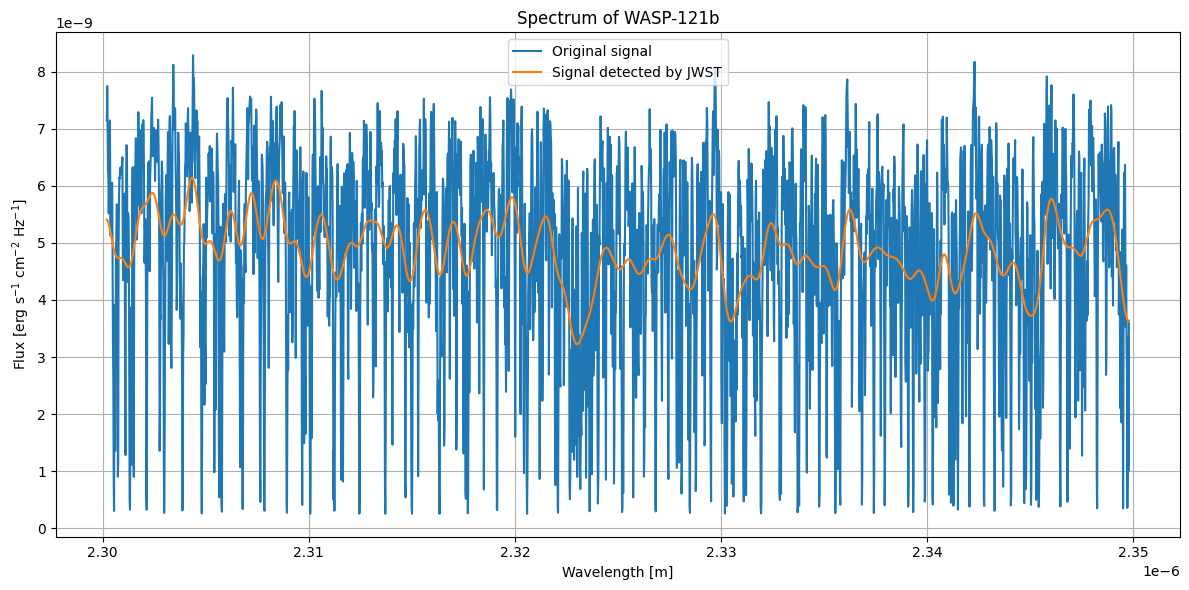

In [16]:
# plot the signal detected by JWST
R_JWST = 3500
flux_JWST = degrade_resolution(wavelength_121, flux_121, R_orig_121, R_JWST)
plt.figure(figsize = (12, 6))
plt.plot(wavelength_121, flux_121, label = 'Original signal')
plt.plot(wavelength_121, flux_JWST, label = 'Signal detected by JWST')
plt.title('Spectrum of WASP-121b')
plt.xlabel(r'Wavelength [m]')
plt.ylabel(r'Flux [erg s$^{-1}$ cm$^{-2}$ Hz$^{-1}$]')
plt.legend(loc = 'best')
plt.grid(True)
plt.tight_layout()
plt.show()

The blue line is the original WASP-121b signal, pure and high-res. The orange line shows the signal as JWST would see it at R = 3500. As you can see, lower resolution means fewer data points and broader lines, losing spectral detail. This can cause uncertainty in future analyses like measuring wind speed with cross-correlation. Next, try Earth-based CRIRES at R = 100,000:

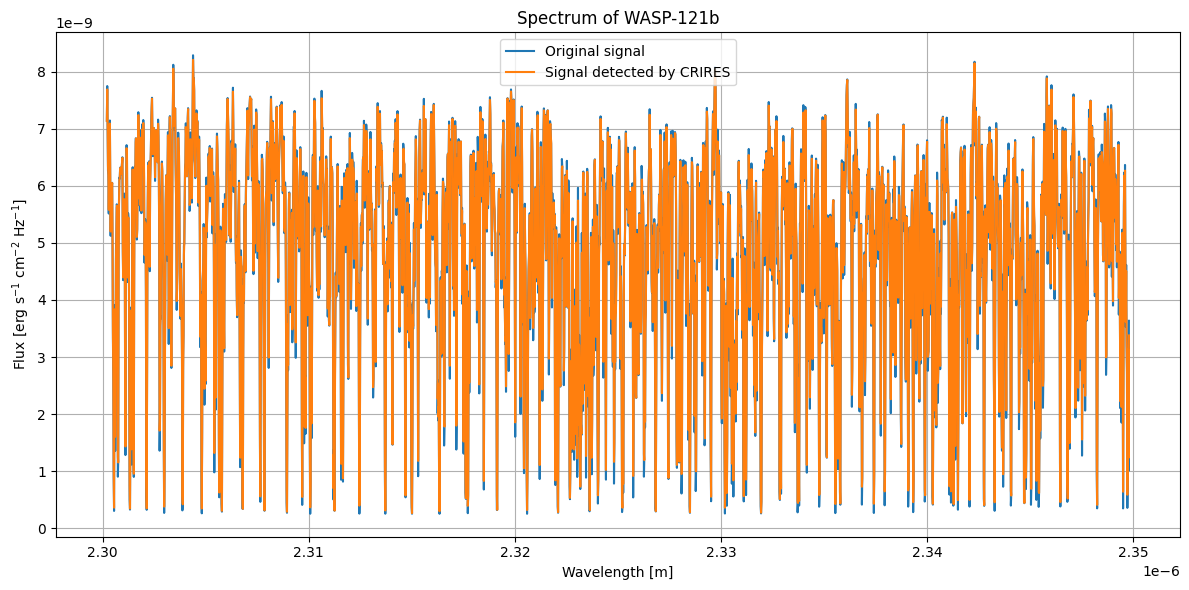

In [17]:
# plot the signal detected by CRIRES
R_CRIRES = 100000
flux_CRIRES = degrade_resolution(wavelength_121, flux_121, R_orig_121, R_CRIRES)
plt.figure(figsize = (12, 6))
plt.plot(wavelength_121, flux_121, label = 'Original signal')
plt.plot(wavelength_121, flux_CRIRES, label = 'Signal detected by CRIRES')
plt.title('Spectrum of WASP-121b')
plt.xlabel(r'Wavelength [m]')
plt.ylabel(r'Flux [erg s$^{-1}$ cm$^{-2}$ Hz$^{-1}$]')
plt.legend(loc = 'best')
plt.grid(True)
plt.tight_layout()
plt.show()

The CRIRES signal looks almost identical to the original because its resolution is close to the model’s R = 125,000. The detail is mostly preserved, with more data points than JWST. Finally, here’s a comparison at different resolutions:

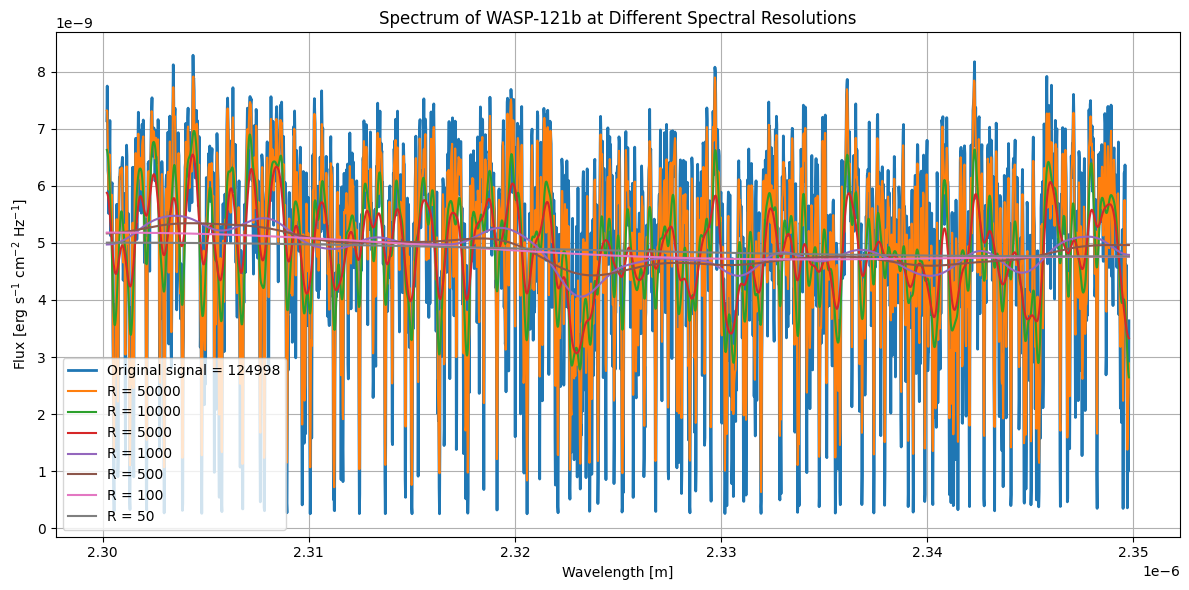

In [18]:
R_targets = [50000, 10000, 5000, 1000, 500, 100, 50]
plt.figure(figsize = (12, 6))
plt.plot(wavelength_121, flux_121, label = f'Original signal = {int(round(R_orig_121))}', linewidth = 2)
for R in R_targets:
    flux_target = degrade_resolution(wavelength_121, flux_121, R_orig_121, R)
    plt.plot(wavelength_121, flux_target, label = f'R = {R}')
plt.title('Spectrum of WASP-121b at Different Spectral Resolutions')
plt.xlabel(r'Wavelength [m]')
plt.ylabel(r'Flux [erg s$^{-1}$ cm$^{-2}$ Hz$^{-1}$]')
plt.legend(loc = 'best')
plt.grid(True)
plt.tight_layout()
plt.show()

The plot confirms that as resolution drops, the number of points decreases and lines broaden. Ground-based instruments usually get very high resolution but must handle Earth's atmospheric contamination. Space telescopes avoid that but have lower resolution and less detail. Both have pros and cons, but we won’t get into that here. Next up, we’ll see how to calculate wind speeds in an exoplanet atmosphere.

## Wind Speed Measurement

Now that we understand cross-correlation and high-resolution spectroscopy, we can use these tools to measure wind speeds on exoplanets. We start with two datasets:

- No-wind spectrum: the planet’s spectrum assuming no atmospheric wind (Doppler off).

- Wind spectrum: the planet’s spectrum including horizontal winds (Doppler on).

Cross-correlation helps us quantify the similarity between these two spectra. When we compute the cross-correlation function (CCF), the peak position corresponds to the wind speed on the planet. This is because wind causes a Doppler shift in spectral lines, shifting them to the blue or red end depending on the wind direction relative to the observer. By cross-correlating the wind-shifted spectrum with the no-wind reference, we test a range of velocity shifts. The velocity shift that produces the highest correlation (the CCF peak) reveals the Doppler shift caused by the wind, thus giving the wind speed. This technique was successfully used by Snellen et al. (2010) to detect blue-shifted carbon monoxide absorption lines in the atmosphere of HD 209458b, indicating strong winds flowing from the day side to the night side of the planet.

### Plotting the Doppler Off vs. Doppler On Spectra

First, let’s load and plot the two WASP-121b spectra: Doppler off (no wind) and Doppler on (wind present):

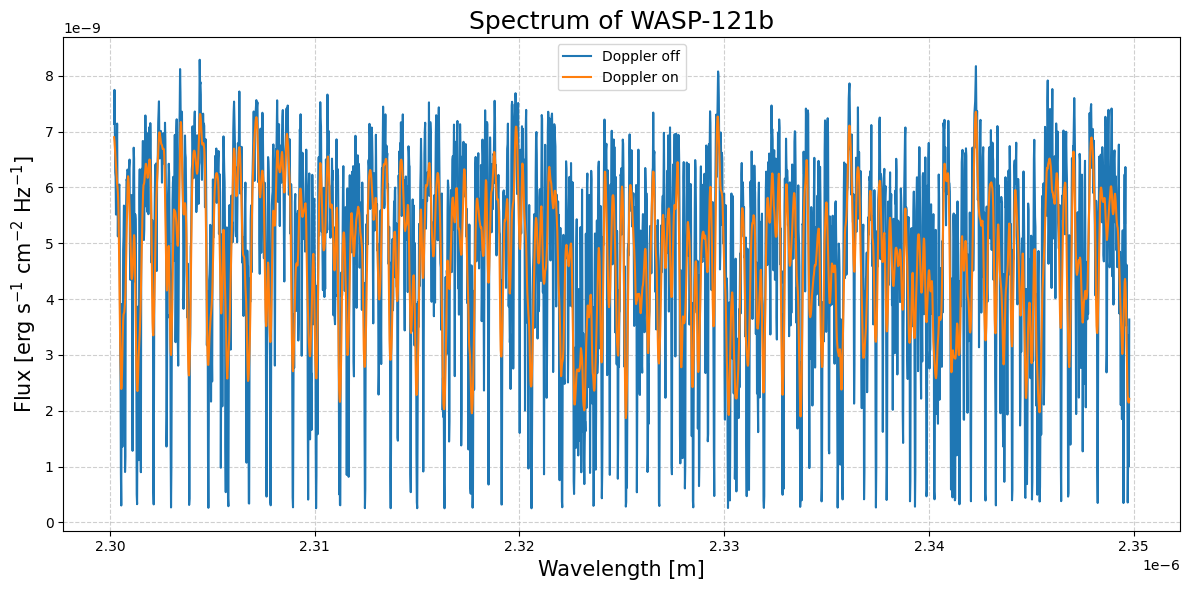

In [19]:
# path to open file for doppler off case
file_path_121_off = '/Users/srnpt.p/Desktop/UMD_Summer_Project/W121/Spec_0_asp-121b-0G_IR_phase_0.0_inc_00.00.0000.00.dat'
df_121_off = pd.read_csv(file_path_121_off, sep = '\t', header = None, names = ['wavelength', 'flux']).iloc[10:-10]
wavelength_121_off = df_121_off['wavelength'].values
flux_121_off = df_121_off['flux'].values

# path to open file for doppler on case
file_path_121_on = '/Users/srnpt.p/Desktop/UMD_Summer_Project/W121/Spec_1_asp-121b-0G_IR_phase_0.0_inc_00.00.0000.00.dat'
df_121_on = pd.read_csv(file_path_121_on, sep = '\t', header = None, names = ['wavelength', 'flux']).iloc[10:-10]
wavelength_121_on = df_121_on['wavelength'].values
flux_121_on = df_121_on['flux'].values

# plot
plt.figure(figsize = (12, 6))
plt.plot(wavelength_121_off, flux_121_off, label = 'Doppler off')
plt.plot(wavelength_121_on, flux_121_on, label = 'Doppler on')
plt.title('Spectrum of WASP-121b', fontsize = 18)
plt.xlabel(r'Wavelength [m]', fontsize = 15)
plt.ylabel(r'Flux [erg s$^{-1}$ cm$^{-2}$ Hz$^{-1}$]', fontsize = 15)
plt.legend(loc = 'best')
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.tight_layout()
plt.show()

We see that wind changes the spectral lines on the wavelength grid.

### Measuring Wind Speed via Cross-Correlation

Instead of using a simple np.correlate, we implement a custom cross-correlation function to find the wind speed more accurately by comparing Doppler off and Doppler on spectra.

In [20]:
# define function to do cross-correlation between two different datasets
def cross_correlation_function(filename_off, filename_on, R_target, velocity_range = 20, nc = 300, plot = True):
    c = 299792.458 # define speed of light in km/s

    # load spectra
    df_off = pd.read_csv(filename_off, sep = '\t', header = None, names = ['wavelength', 'flux']).iloc[10:-10]
    df_on  = pd.read_csv(filename_on,  sep = '\t', header = None, names = ['wavelength', 'flux']).iloc[10:-10]
    wavelength_off = df_off['wavelength'].values
    flux_off = df_off['flux'].values
    wavelength_on = df_on['wavelength'].values
    flux_on = df_on['flux'].values

    # recall function that can use to find the resolution of original signal
    R_orig = calculate_original_resolution(wavelength_off) # as they come from the same grid, resolution will be the same even though you use wavelength_on

    # degrade both spectra to target resolution
    flux_off_R = degrade_resolution(wavelength_off, flux_off, R_orig, R_target)
    flux_on_R  = degrade_resolution(wavelength_on,  flux_on,  R_orig, R_target)

    # limit to shared wavelength region
    min_wl = max(wavelength_off.min(), wavelength_on.min())
    max_wl = min(wavelength_off.max(), wavelength_on.max())
    mask_off = (wavelength_off >= min_wl) & (wavelength_off <= max_wl)
    mask_on  = (wavelength_on  >= min_wl) & (wavelength_on  <= max_wl)

    wavelength_off, flux_off_R = wavelength_off[mask_off], flux_off_R[mask_off]
    wavelength_on,  flux_on_R  = wavelength_on[mask_on],  flux_on_R[mask_on]

    # sort wavelength_off and flux_off_R by wavelength_off ascending
    sort_idx = np.argsort(wavelength_off)
    wavelength_off_sorted = wavelength_off[sort_idx]
    flux_off_R_sorted = flux_off_R[sort_idx]

    # remove NaNs and infs
    valid_mask = (~np.isnan(wavelength_off_sorted)) & (~np.isnan(flux_off_R_sorted)) & (~np.isinf(wavelength_off_sorted)) & (~np.isinf(flux_off_R_sorted))

    wavelength_off_clean = wavelength_off_sorted[valid_mask]
    flux_off_R_clean = flux_off_R_sorted[valid_mask]

    # check strictly increasing wavelengths
    if not np.all(np.diff(wavelength_off_clean) > 0):
        raise ValueError('wavelength array is not strictly increasing after cleaning.')

    # build spline model from OFF spectrum (cleaned data)
    model = splrep(wavelength_off_clean, flux_off_R_clean, s = 0)

    # define velocity lags
    velocity_lags = np.linspace(-velocity_range, velocity_range, nc)
    ccf = np.zeros_like(velocity_lags)

    # compute cross-correlation at each velocity lag
    for i, v in enumerate(velocity_lags):
        shifted_wavelength = wavelength_off_clean * (1 - v / c)
        shifted_flux = splev(shifted_wavelength, model)

        f1 = shifted_flux - np.mean(shifted_flux)
        f2 = flux_on_R - np.mean(flux_on_R)

        ccf[i] = np.sum(f1 * f2) / len(f1)
        ccf[i] /= (np.std(shifted_flux) * np.std(flux_on_R))

    # find peak index
    peak_index = np.argmax(ccf)
    velocity_at_peak_ccf = velocity_lags[peak_index]

    # plot the CCF
    if plot:
        plt.figure(figsize = (12, 6))
        plt.plot(velocity_lags, ccf, label = f'Signal detected at R = {R_target:.0f}', linewidth = 2)
        plt.axvline(x = velocity_at_peak_ccf, linestyle = '--', color = 'r')
        plt.xlabel('Velocity shift [km/s]', fontsize = 14)
        plt.ylabel('Normalized cross-correlation', fontsize = 14)
        plt.title('Normalized cross-correlation vs. velocity shift', fontsize = 16)
        plt.grid(True, linestyle = '--', alpha = 0.6)
        plt.legend(fontsize = 12)
        plt.tight_layout()
        plt.show()

    # peak velocity where CCF is maximized
    v_peak = velocity_lags[np.argmax(ccf)]

    return velocity_lags, ccf, v_peak

#### Inputs

- filename_off: File path for no-wind spectrum.

- filename_on: File path for wind-affected spectrum.

- R_target: Target instrument resolution for degrading spectra.

- velocity_range: Maximum velocity (km/s) for cross-correlation window.

- nc: Number of velocity points.

- plot: Whether to plot the normalized CCF.

#### How the Function Works

1. Loads and cleans both spectra.

2. Estimates original spectral resolution.

3. Degrades spectra to target instrument resolution.

4. Restricts comparison to common wavelength range.

5. Interpolates Doppler off spectrum using spline.

6. Computes normalized cross-correlation over velocity shifts.

7. Finds peak correlation velocity — the inferred wind speed.

8. Optionally plots the cross-correlation function.

### Estimating Wind Speed at Full Resolution

Using the function on the WASP-121b data at full original resolution:

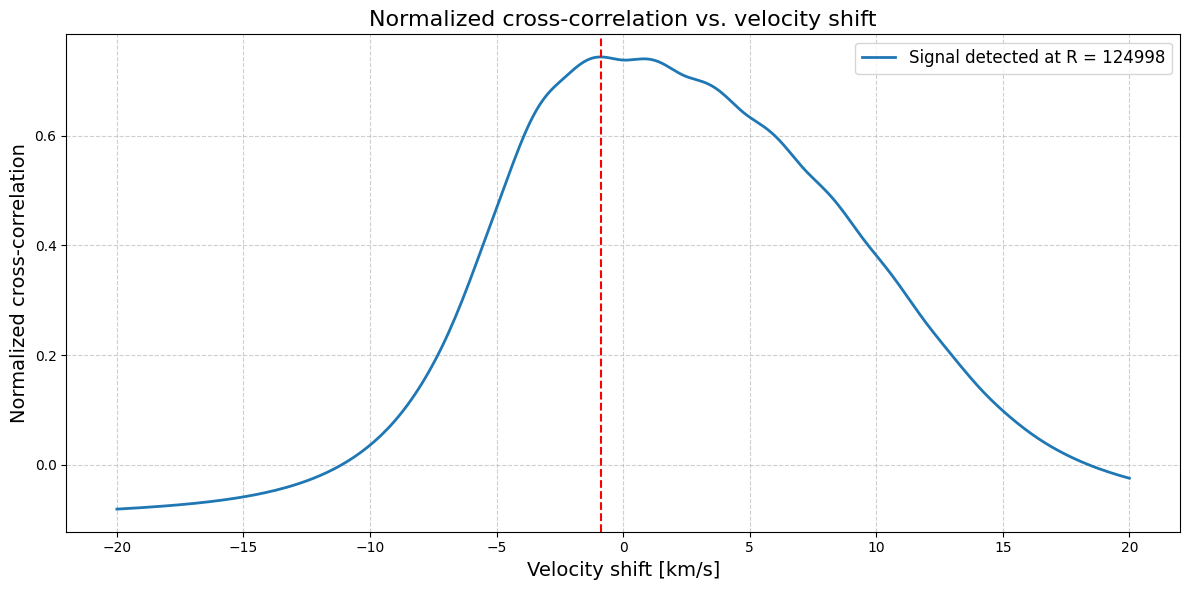

Velocity peak = -0.87 km/s


In [21]:
# cross correlation to find wind speed
vel_lags, ccf_vals, v_peak = cross_correlation_function(
    filename_off  = file_path_121_off,
    filename_on   = file_path_121_on,
    R_target      = calculate_original_resolution(wavelength_121),
    velocity_range = 20,
    plot          = True
)

print(f"Velocity peak = {v_peak:.2f} km/s")

The peak at around −0.87 km/s means the horizontal wind speed at this location is roughly −0.87 km/s.

### Effect of Instrument Resolution on Wind Speed Measurement

Let's see how degrading resolution to match JWST (R = 3500) affects wind speed measurement:

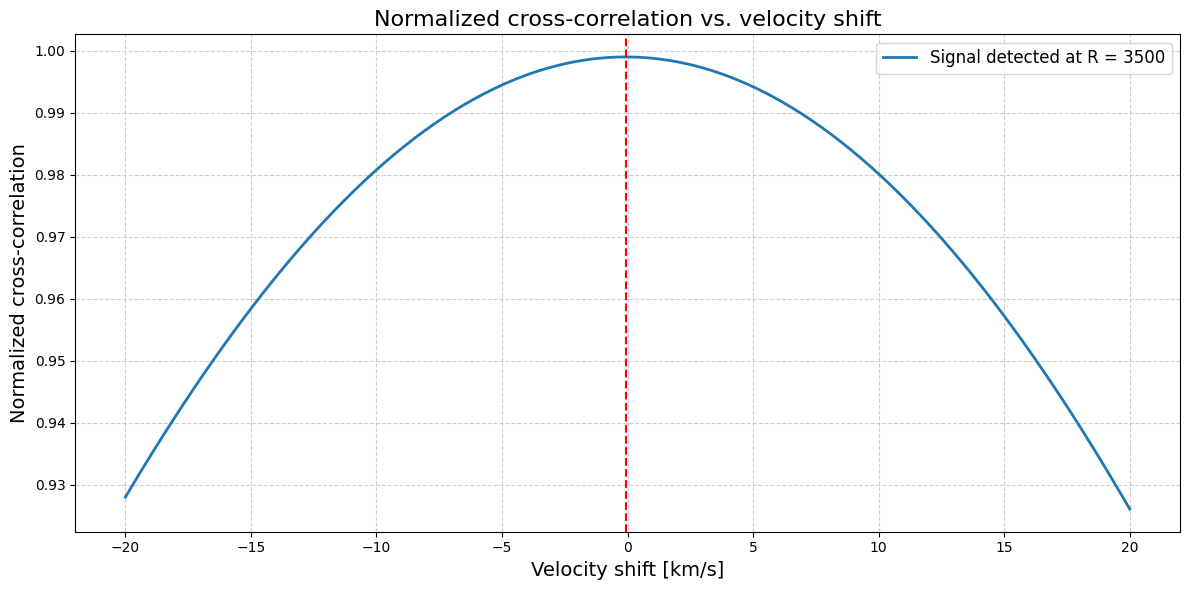

Velocity peak = -0.07 km/s


In [22]:
# cross correlation to find wind speed detected by JWST
vel_lags, ccf_vals, v_peak = cross_correlation_function(
    filename_off  = file_path_121_off,
    filename_on   = file_path_121_on,
    R_target      = R_JWST,
    velocity_range = 20,
    plot          = True
)

print(f"Velocity peak = {v_peak:.2f} km/s")

Here the velocity peak shifts to about −0.07 km/s, underestimating the true wind speed. JWST’s lower resolution smooths spectral features, reducing measurement accuracy. Next, we check a high-resolution instrument like CRIRES (R = 100,000):

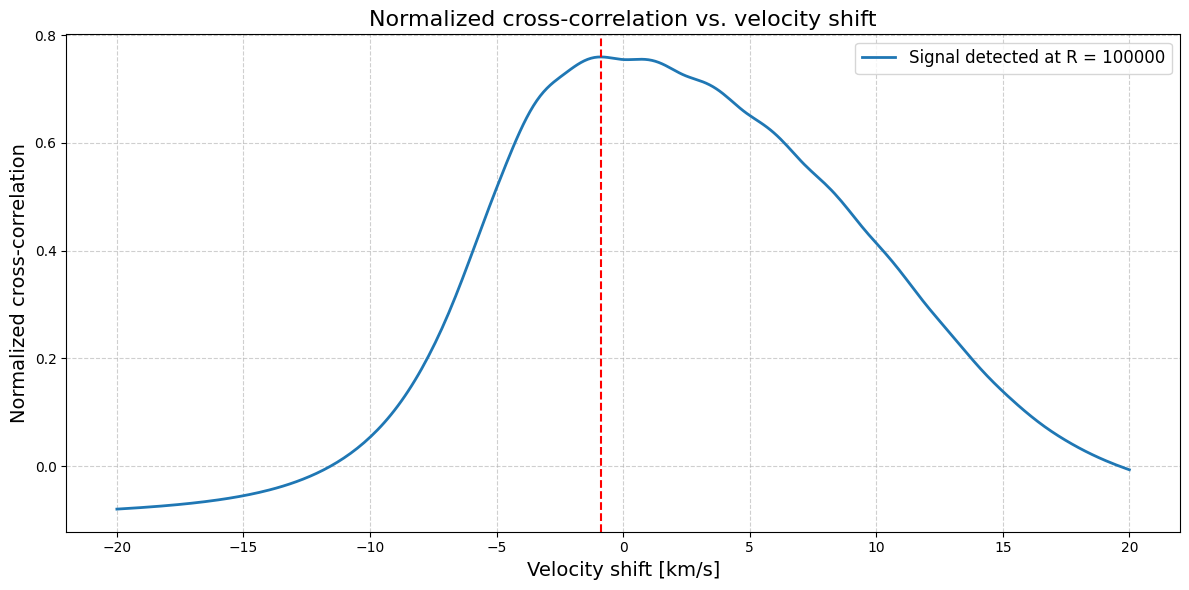

Velocity peak = -0.87 km/s


In [23]:
# cross correlation to find wind speed detected by JWST
vel_lags, ccf_vals, v_peak = cross_correlation_function(
    filename_off  = file_path_121_off,
    filename_on   = file_path_121_on,
    R_target      = R_CRIRES,
    velocity_range = 20,
    plot          = True
)

print(f"Velocity peak = {v_peak:.2f} km/s")

The result matches the full-resolution measurement well because CRIRES resolution is close to the original data’s.

### Resolution vs. Wind Speed Measurement Accuracy

Finally, visualize how resolution affects wind speed accuracy by plotting the difference between true wind speed and measured wind speed across resolutions:

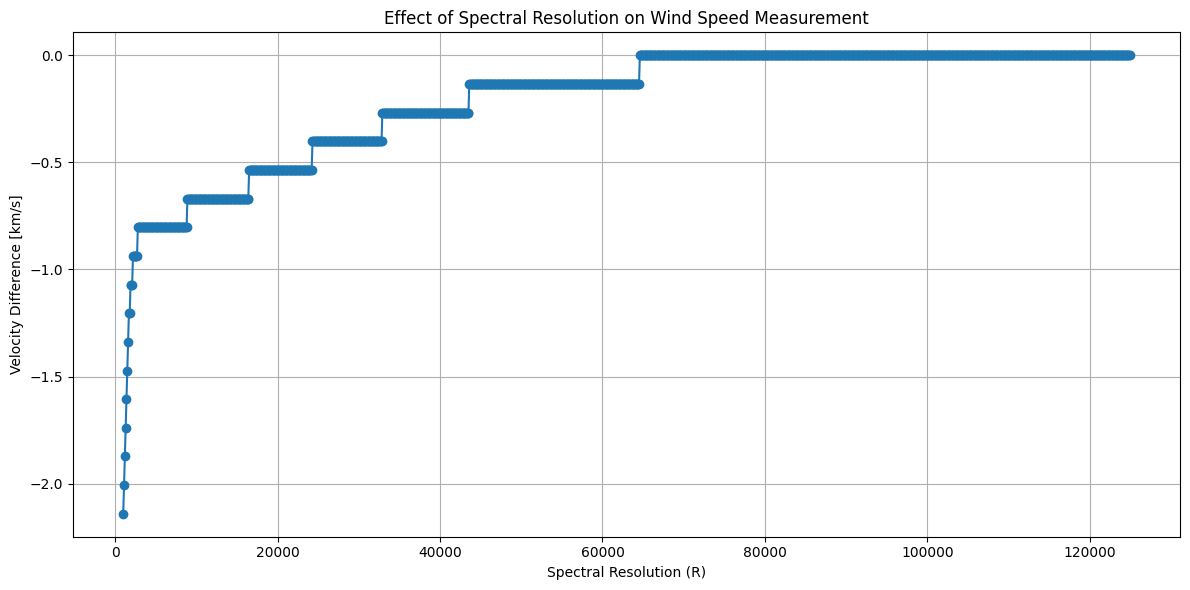

In [24]:
# calculate resolution of original signal
R_orig = calculate_original_resolution(wavelength_121)

# calculate v peak at original resolution
_, _, v_peak_orig = cross_correlation_function(
    filename_off    = file_path_121_off,
    filename_on     = file_path_121_on,
    R_target        = R_orig,
    velocity_range  = 20,
    plot            = False
    )

# define resolution range
R_range = np.arange(1000, int(R_orig) + 1, 100)

# loop and store results
velocity_differences = []
resolutions = []

for R in R_range:
    try:
        _, _, v_peak = cross_correlation_function(
            filename_off    = file_path_121_off,
            filename_on     = file_path_121_on,
            R_target        = R,
            velocity_range  = 20,
            plot            = False
        )
        delta_v = v_peak_orig - v_peak
        velocity_differences.append(delta_v)
        resolutions.append(R)
    except Exception as e:
        print(f"Failed at R = {R}: {e}")

# plot
plt.figure(figsize = (12, 6))
plt.plot(resolutions, velocity_differences, marker = 'o')
plt.xlabel("Spectral Resolution (R)")
plt.ylabel("Velocity Difference [km/s]")
plt.title("Effect of Spectral Resolution on Wind Speed Measurement")
plt.grid(True)
plt.tight_layout()
plt.show()

As expected, decreasing resolution increases uncertainty in wind speed estimates. Ground-based instruments typically achieve high resolution but face atmospheric contamination, while space-based instruments avoid this but operate at lower resolution.

## End of Tutorial

Congratulations! You have reached the end of this tutorial. In this guide, you’ve learned how to perform cross-correlation and use it to estimate the wind speed in an exoplanet's atmosphere. The methods demonstrated here can be adapted to other datasets, whether from your own research or publicly available observations. This notebook is designed to be flexible and easy to modify, allowing you to explore different targets, locations, or magnetic models. If you have any questions or wish to extend your analysis further, feel free to reach out or explore additional resources. Thank you for following along!

## References

Ahrer, E., Wheatley, P. J., Kirk, J., Gandhi, S., King, G. W., & Louden, T. (2022). *LRG-BEASTS: Sodium absorption and Rayleigh scattering in the atmosphere of WASP-94A b using NTT/EFOSC2*. Monthly Notices of the Royal Astronomical Society, 510(4), 4857–4871. [https://doi.org/10.1093/mnras/stab3805](https://doi.org/10.1093/mnras/stab3805)

Beltz, H., & Rauscher, E. (2024). *Comparative Planetology of Magnetic Effects in Ultrahot Jupiters: Trends in High-resolution Spectroscopy*. The Astrophysical Journal, 962(1), 24. [https://ui.adsabs.harvard.edu/abs/2024ApJ...976...32B/abstract](https://ui.adsabs.harvard.edu/abs/2024ApJ...976...32B/abstract)

Birkby, J. L. (2018). *Exoplanet atmospheres at high spectral resolution*. arXiv. [https://doi.org/10.48550/arXiv.1806.04617](https://doi.org/10.48550/arXiv.1806.04617)

Bourrier, V., Ehrenreich, D., Lendl, M., Cretignier, M., Allart, R., Dumusque, X., Cegla, H. M., Suárez-Mascareño, A., Wyttenbach, A., Hoeijmakers, H. J., Melo, C., Kuntzer, T., Astudillo-Defru, N., Giles, H., Heng, K., Kitzmann, D., Lavie, B., Lovis, C., Murgas, F., & Nascimbeni, V. (2020). *Hot Exoplanet Atmospheres Resolved with Transit Spectroscopy (HEARTS). III. Atmospheric structure of the misaligned ultra-hot Jupiter WASP-121b*. Astronomy & Astrophysics, 635, A205. [https://ui.adsabs.harvard.edu/abs/2020A%26A...635A.205B/abstract](https://ui.adsabs.harvard.edu/abs/2020A%26A...635A.205B/abstract)

Esparza-Borges, E., López-Morales, M., Adams Redai, J. I., Pallé, E., Kirk, J., Casasayas-Barris, N., Batalha, N. E., Rackham, B. V., Bean, J. L., Casewell, S. L., et al. (2023). *Detection of carbon monoxide in the atmosphere of WASP-39b applying standard cross-correlation techniques to JWST NIRSpec G395H data*. The Astrophysical Journal Letters. [https://doi.org/10.3847/2041-8213/acf27b](https://doi.org/10.3847/2041-8213/acf27b)

Follert, R., Dorn, R. J., Oliva, E., Lizon, J. L., Hatzes, A., Piskunov, N., Reiners, A., Seemann, U., Stempels, E., Heiter, U., Marquart, T., Lockhart, M., Anglada-Escudé, G., Löwinger, T., Baade, D., Grunhut, J., Bristow, P., Klein, B., Jung, Y., Ives, D. J., Kerber, F., Pozna, E., Paufique, J., Kaeufl, H. U., Origlia, L., Valenti, E., Gojak, D., Hilker, M., Pasquini, L., Smette, A., & Smoker, J. (n.d.). *CRIRES+: A cross-dispersed high-resolution infrared spectrograph for the ESO VLT*. European Southern Observatory. [https://www.eso.org/sci/facilities/develop/instruments/CRIRES_up/CRIRES_up_Overview.pdf](https://www.eso.org/sci/facilities/develop/instruments/CRIRES_up/CRIRES_up_Overview.pdf)

Fortney, J. J., Visscher, C., Marley, M. S., Hood, C. E., Line, M. R., Thorngren, D. P., Freedman, R. S., & Lupu, R. (2020). *Beyond equilibrium temperature: How the atmosphere/interior connection affects the onset of methane, ammonia, and clouds in warm transiting giant planets*. The Astronomical Journal. [https://doi.org/10.3847/1538-3881/abc5bd](https://doi.org/10.3847/1538-3881/abc5bd)

Harris, C. R., Millman, K. J., van der Walt, S. J., et al. (2020). Array programming with NumPy. *Nature, 585*, 357–362. [Publisher link](https://doi.org/10.1038/s41586-020-2649-2)

Harris, G. J., Tennyson, J., Kaminsky, B. M., Pavlenko, Y. V., & Jones, H. R. A. (2006). *Improved HCN/HNC linelist, model atmospheres and synthetic spectra for WZ Cas*. Monthly Notices of the Royal Astronomical Society. [https://doi.org/10.1111/j.1365-2966.2005.09960.x](https://doi.org/10.1111/j.1365-2966.2005.09960.x)

Kempton, E. M.-R., Perna, R., Heng, K., Fortney, J. J., & Hubbard, W. B. (2014). *High resolution transmission spectroscopy as a diagnostic for Jovian exoplanet atmospheres: Constraints from theoretical models*. arXiv. [https://doi.org/10.48550/arXiv.1409.1250](https://doi.org/10.48550/arXiv.1409.1250)

Labiano, A., Argyriou, I., Álvarez-Márquez, J., Glasse, A., Glauser, A., Patapis, P., Law, D., Brandl, B. R., Justtanont, K., Lahuis, F., Martínez-Galarza, J. R., Mueller, M., Noriega-Crespo, A., Royer, P., Shaughnessy, B., & Vandenbussche, B. (2021). *Wavelength calibration and resolving power of the JWST MIRI Medium Resolution Spectrometer*. Astronomy & Astrophysics, 656, A135.  
[https://doi.org/10.1051/0004-6361/202140614](https://www.aanda.org/articles/aa/full_html/2021/12/aa40614-21/aa40614-21.html)

Ranjan, S., Charbonneau, D., Désert, J.-M., Madhusudhan, N., Deming, D., Wilkins, A., & Mandell, A. M. (2014). *Atmospheric characterization of five hot Jupiters with the Wide Field Camera 3 on the Hubble Space Telescope*. The Astrophysical Journal, 785(2), 148. [https://doi.org/10.1088/0004-637X/785/2/148](https://doi.org/10.1088/0004-637X/785/2/148)

Rothman, L. S., Gordon, I. E., Barber, R. J., Dothe, H., Gamache, R. R., Goldman, A., Perevalov, V., Tashkun, S. A., & Tennyson, J. (2010). HITEMP, the high-temperature molecular spectroscopic database. *Journal of Quantitative Spectroscopy and Radiative Transfer, 111*, 2139–2150. [https://doi.org/10.1016/j.jqsrt.2010.05.001](https://doi.org/10.1016/j.jqsrt.2010.05.001)

SciPy Developers. (n.d.). *scipy.signal.correlate*. SciPy v1.16.0 Reference Guide. [https://docs.scipy.org/doc/scipy-1.16.0/reference/generated/scipy.signal.correlate.html](https://docs.scipy.org/doc/scipy-1.16.0/reference/generated/scipy.signal.correlate.html)

Snellen, I. A. G., de Kok, R. J., de Mooij, E. J. W., & Albrecht, S. (2010). *The orbital motion, absolute mass and high-altitude winds of exoplanet HD 209458b*. Nature, 465(7301), 1049–1051. [https://ui.adsabs.harvard.edu/abs/2010Natur.465.1049S/abstract](https://ui.adsabs.harvard.edu/abs/2010Natur.465.1049S/abstract)

Virtanen, P., Gommers, R., Oliphant, T. E., Haberland, M., Reddy, T., Cournapeau, D., Burovski, E., Peterson, P., Weckesser, W., Bright, J., van der Walt, S. J., Brett, M., Wilson, J., Millman, K. J., Mayorov, N., Nelson, A. R. J., Jones, E., Kern, R., Larson, E., Carey, C. J., Polat, İ., Feng, Y., Moore, E. W., VanderPlas, J., Laxalde, D., Perktold, J., Cimrman, R., Henriksen, I., Quintero, E. A., Harris, C. R., Archibald, A. M., Ribeiro, A. H., Pedregosa, F., van Mulbregt, P., & SciPy 1.0 Contributors. (2020). SciPy 1.0: Fundamental algorithms for scientific computing in Python. *Nature Methods, 17*, 261–272. [Publisher link](https://www.nature.com/articles/s41592-019-0686-2)

Wei, P.-S., Hsieh, Y.-C., Chiu, H.-H., Yen, D.-L., Lee, C., Tsai, Y.-C., & Ting, T.-C. (2018). *Absorption coefficient of carbon dioxide across atmospheric troposphere layer*. Scientific Reports, 8, 17659. [https://pmc.ncbi.nlm.nih.gov/articles/PMC6174548/](https://pmc.ncbi.nlm.nih.gov/articles/PMC6174548/)

## About this Notebook

Author(s): Sarunyapat (Pat) Phoompuang (sphoom22@terpmail.umd.edu) and Hayley Beltz (hbeltz@umd.edu)

Last updated: July 2025